Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 06 in Python 
---------------
- ___Please put your names and student IDs here___:
    - Wei-Cheng Lin, 01/1348028
    - Kuon Ito, 01/1358810

---

## Exercise 1: The role of Kernels in Support Vector Machines 
In this exercise we want to investigate why we use kernels in SVMs, and how they work.

<span style="color:red">Make sure to have the plotting_utils.py file in the same folder as this notebook.</span>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
%matplotlib inline
from plotting_utils import make_blobs, plot_2d_separator, discrete_scatter 

#### a) Given is the following dataset. 

Text(0, 0.5, 'Feature 1')

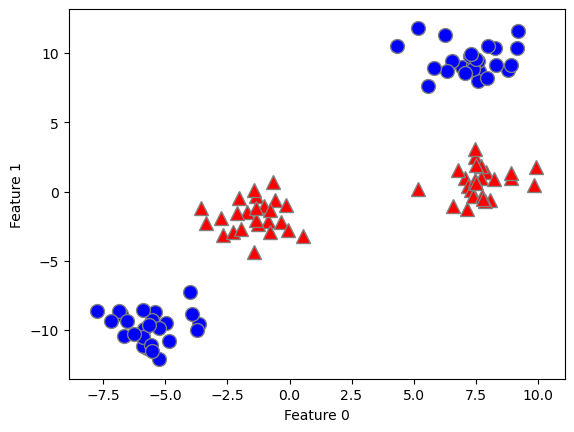

In [2]:
# No need to change anything here
c=['b', 'r', 'g']
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

discrete_scatter(X[:, 0], X[:, 1], y, c=c)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Fit a linear SVM (`LinearSVC` in the scikit-learn) to this dataset. Plot both the data and the resulting decision boundary. You can use the function plot_2d_separator from the plotting_utils.py file by just calling `plot_2d_separator(trained_model, X)`to draw the decision boundary.**

/Users/linweicheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


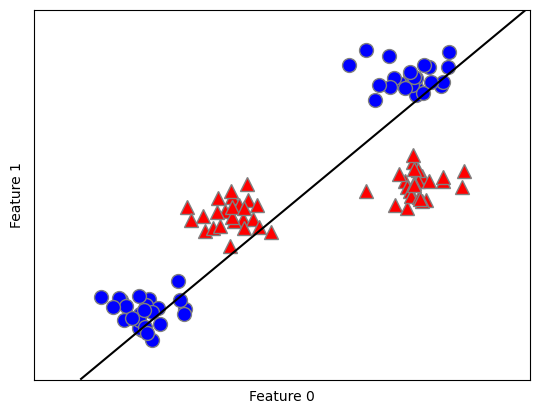

In [3]:
svm = LinearSVC()
svm.fit(X, y)
plot_2d_separator(svm, X)

discrete_scatter(X[:, 0], X[:, 1], y, c=c)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

**Describe what the issue is with the given data.**

```
Due to the inherent non-linearity in the dataset, a traditional SVM with a hyperplane is insufficient to achieve a satisfactory separation. Therefore, the application of the kernel trick is considered. By employing a suitable kernel function, the feature space can be transformed, potentially enabling the SVM to find a non-linear decision boundary that better captures the underlying structure of the data.
```

### SVM with differente kernels

#### c) What is the idea of the kernel trick? What is an RBF kernel? Give a brief explanation.

```
The kernel trick is a technique used in machine learning, particularly in support vector machines (SVMs), to implicitly map input data into a higher-dimensional space without explicitly computing the transformed feature vectors.

The RBF kernel is widely used because it introduces non-linearity and flexibility to SVMs, enabling them to capture complex decision boundaries. The parameter σ controls the smoothness of the decision boundary: a smaller σ leads to a more complex, wiggly boundary, while a larger σ results in a smoother boundary.
```

#### d) Now let's use a kernel SVM to fit the data.

Fit a kernel SVM to the dataset from above. Use an `Radial Basis Function` kernel.
You can use the default `SVC` from scikit-learn. Plot both the dataset the decision boundary of the SVM using the `plot_2d_separator(trained_model, X)`. Try to also visualize the support vectors.

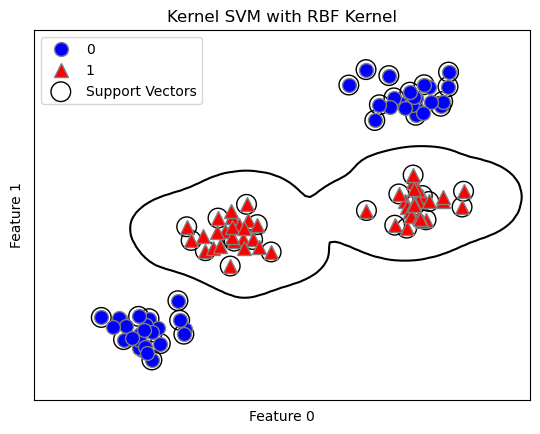

In [4]:
from sklearn.svm import SVC

discrete_scatter(X[:, 0], X[:, 1], y, c=c)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

svm_rbf = SVC(kernel='rbf', gamma='auto')
svm_rbf.fit(X, y)

plot_2d_separator(svm_rbf, X)


plt.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.legend()
plt.title("Kernel SVM with RBF Kernel")
plt.show()

**What do you observe?**

```
The RBF kernel introduces a non-linear transformation, allowing the SVM to learn a more complex decision boundary that can capture non-linear relationships in the data.
```

### Exercise 2: Forward Pass in a Multilayer Neural Networks

You are given the following feed-forward neural network containing 2 input neurons, 2 hidden neuron and 1 output neurons:

![network.png](network.png)

w1 to w6 represent the weights of the connections between the neurons. Their exact values can be found in this table:

|Weight|Value|
|-----|------|
|w1|-0.7|
|w2|0.6|
|w3|-0.4|
|w4|0.6|
|w5|-0.3|
|w6|1.0|

Non-input Neuron also have a Bias shown in this table:


|Neuron|Bias|
|-----|-----|
|N3|0.6|
|N4|0.1|
|N5|-1.3|

Assume a sigmoidal activation function $g(x) = 1 / (1+e^{-x})$ in each Neuron.

Calculate the Input and Output of N3, N4 and N5 with input:

|Neuron|Input|
|-----|-----|
|N1|-1.5|
|N2|3.0|

_(Hint: Input Neurons do not use the activation function. The Output of N1 and N2 are therefore the same as their respective Inputs.)_

__For this exercise, you can cut each result at the third digit after the dot. (e.g. 0.12345 becomes 0.123)__


Input N3: 0,45

Output N3: 0,611

Input N4: 1

Output N4: 0,731

Input N5: -0,7523

Output N5: 0,320

![](EXERCISE2.jpg)

### Exercise 3: Perceptron Implementation

In this exercise, the task is to implement a Perceptron algorithm in Python. Below, we give a bi-dimensional dataset and the class values.



|X    |Y    |Class(OR)|Class(AND)|
|-----|-----|---------|---------|
| 0 | 0 | 0 | 0 |        
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 |
    


##### __(a) In your implementation of a Perceptron, build a Python Class `Perceptron` with the following methods and inputs:__
* Constructor: `__init__(self, learning_rate, number_iterations)`
* Learning funtion: `learn(self, X, y)` where `X` is the training example data as a 2D `numpy.array`and `y`is the training data labels example as a  a 1D `numpy.array`
* Predict function: `predict(self, x)` where `x` is a  1D `numpy.array` with the data that should be classified  
* learning rate

_Your function should print the weights for each iteration and data point._

In [5]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate, num_epochs):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def initialize_weights(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def predict(self, inputs):
        activation = np.dot(inputs, self.weights) + self.bias
        return 1 if activation > 0 else 0

    def update_weights(self, inputs, target):
        prediction = self.predict(inputs)
        error = target - prediction
        self.weights += self.learning_rate * error * inputs
        self.bias += self.learning_rate * error

    def learn(self, X, y):
        num_features = X.shape[1]
        self.initialize_weights(num_features)

        for epoch in range(self.num_epochs):
            for inputs, target in zip(X, y):
                self.update_weights(inputs, target)

##### __(b) Run your Perceptron and set an initial value for the learning rate, the weights (e.g., `<0,0,0>`) and number of iterations. Check the for the OR and AND class the correctness of the classification outputs.__

(Hint: Make sure the learning rate is not too high, otherwise the algorithm will not converge.)

In [6]:
inputs = [
    [0., 0.],
    [1., 0.],
    [0., 1.],
    [1., 1.]
]

X = np.array(inputs)
y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])

In [7]:
p = Perceptron(0.01, 5) 

p.learn(X, y_or)
for i, e in zip(inputs, y_or):
    print(f"{i} --> {p.predict(i)}. Excepted {e}")

[0.0, 0.0] --> 0. Excepted 0
[1.0, 0.0] --> 1. Excepted 1
[0.0, 1.0] --> 1. Excepted 1
[1.0, 1.0] --> 1. Excepted 1


In [8]:
p_and = Perceptron(0.01, 1000)
p_and.learn(X, y_and)

print("\nAND Operation:")
for i, e in zip(inputs, y_and):
    prediction = p_and.predict(i)
    print(f"{i} --> {prediction}. Expected {e}")


AND Operation:
[0.0, 0.0] --> 0. Expected 0
[1.0, 0.0] --> 0. Expected 0
[0.0, 1.0] --> 0. Expected 0
[1.0, 1.0] --> 1. Expected 1


##### __(d) When using your perceptron implementation, try to train a model, which classifies the XOR gate `<0,1,1,0>`. Comment on the result and try to explain why it does not work.__

|X    |Y    |Class(XOR)|
|-----|-----|---------|
| 0 | 0 | 0 |       
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [9]:
y_xor = np.array([0, 1, 1, 0])
p_xor = Perceptron(0.01, 1000)
p_xor.learn(X, y_and)

print("\nXOR Operation:")
for i, e in zip(inputs, y_and):
    prediction = p_and.predict(i)
    print(f"{i} --> {prediction}. Expected {e}")


XOR Operation:
[0.0, 0.0] --> 0. Expected 0
[1.0, 0.0] --> 0. Expected 0
[0.0, 1.0] --> 0. Expected 0
[1.0, 1.0] --> 1. Expected 1


```
The XOR gate is a classic example of a problem that a single-layer perceptron cannot solve. This is because the XOR function is not linearly separable, meaning that a single straight line (hyperplane) cannot separate the classes. In other words, there is no way to find a set of weights and biases for a single-layer perceptron that can correctly classify all four XOR input-output pairs.
```

***<span style="color:orange">Feedback: </span>***

- Overall looks great!
- Exericse 1 looks good, nice comprehensive explanation
- Calculations in Exercise 2 looks perfect
- The code in Exercise 3 also looks correct
            

***<span style="color:green">Well done. Grade:green</span>***